In [37]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from parzen_window import Parzen_Window_Classifier
from svm import SVM
from utils import plot_decision_boundary
from logistic_regression import Logistic_Regression
from sklearn.metrics import accuracy_score

In [38]:
iris = load_iris()
X = iris.data[:, [0, 1]]
y = iris.target
mask = y != 2
X_train = X[mask]
y_train = y[mask]
y_train = np.where(y_train == 0, -1, 1)
indices = np.random.permutation(len(X_train))
X_train = X_train[indices]
y_train = y_train[indices]

In [39]:
def plot_hyperplane(X, w, b, offset):
    return (-w[0] * X + b + offset) / w[1]

def plot_svm(X, y, w, b):
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o')
    x0_1 = np.min(X[:, 0])
    x0_2 = np.max(X[:, 0])

    x1_1 = plot_hyperplane(x0_1, w, b, 0)
    x1_2 = plot_hyperplane(x0_2, w, b, 0)

    x1_1n = plot_hyperplane(x0_1, w, b, -1)
    x1_2n = plot_hyperplane(x0_2, w, b, -1)

    x1_1p = plot_hyperplane(x0_1, w, b, 1)
    x1_2p = plot_hyperplane(x0_2, w, b, 1)
    plt.plot([x0_1, x0_2], [x1_1, x1_2], 'y--')
    plt.plot([x0_1, x0_2], [x1_1n, x1_2n], 'k')
    plt.plot([x0_1, x0_2], [x1_1p, x1_2p], 'k')
    plt.show()

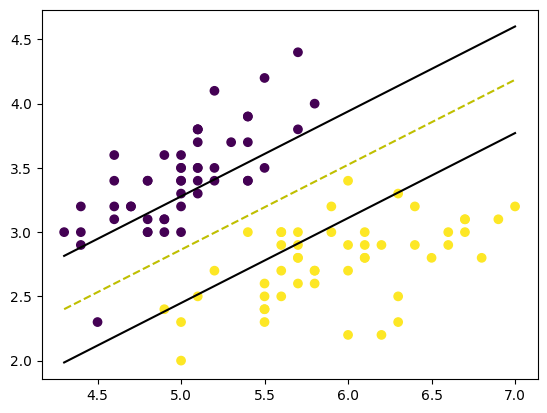

In [40]:
svm = SVM()
svm.fit(X_train, y_train)
w, b = svm.w, svm.b
plot_svm(X_train, y_train, w, b)


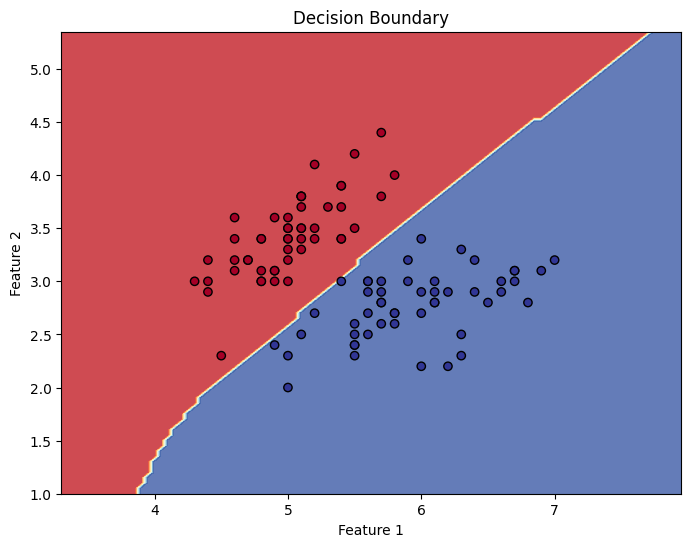

In [41]:
p_window = Parzen_Window_Classifier(kernel_function='gaussian', h=1)
p_window.fit(X_train, y_train)
plot_decision_boundary(p_window, X_train, y_train)

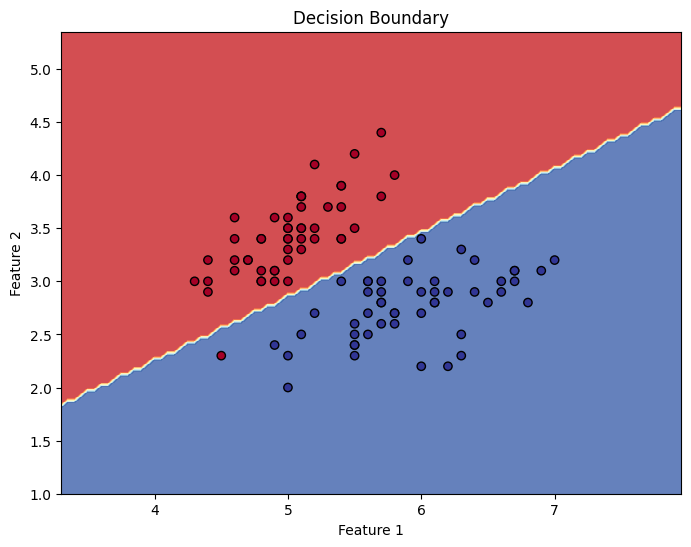

0.99

In [42]:
model = Logistic_Regression()
y_train = np.where(y_train == -1, 0, 1)
model.fit(X_train, y_train)
preds = model.predict(X_train)
plot_decision_boundary(model, X_train, y_train)
accuracy_score(y_train, preds)

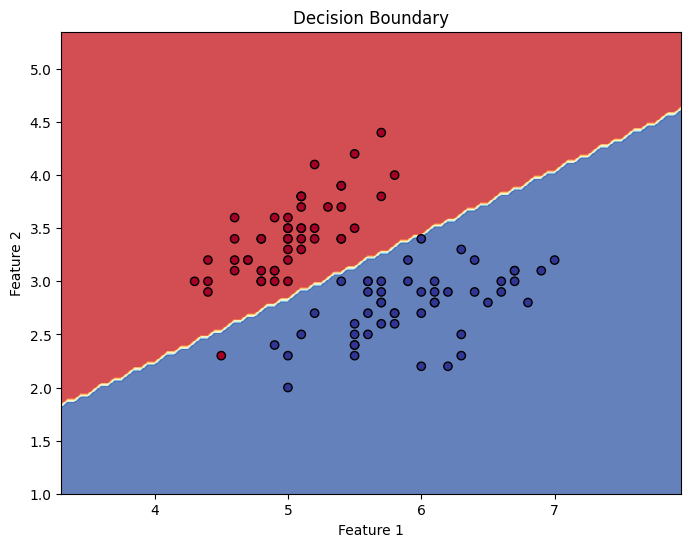

In [43]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear')
lrc.fit(X_train, y_train)
plot_decision_boundary(lrc, X_train, y_train)

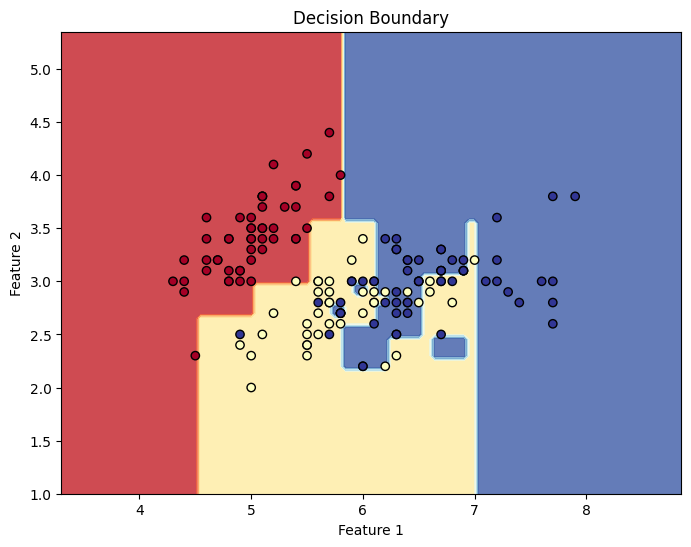

0.88

In [44]:
from decision_tree_classifier import Decision_Tree_Classifier

iris = load_iris()
X_train = iris.data[:, [0, 1]]
y_train = iris.target

model = Decision_Tree_Classifier()
model.fit(X_train, y_train)
preds = model.predict(X_train)
plot_decision_boundary(model, X_train, y_train)
accuracy_score(y_train, preds)
